In [1]:
%matplotlib inline 
# file name with directory
import os

import glob
import re
import numpy as np

import matplotlib.pyplot as plt

FTLEFiled = list(glob.glob(os.path.join("HighRes_FTLE",'*.*')))
def extract_number(filename):
    # Extract time from FTLE_DoubleGyre2D10.bin format
    match = re.search(r'DoubleGyre2D(\d+)', filename)
    if match:
        return int(match.group(1))
    return 0

FTLEFiled.sort(key=extract_number)
FTLEFiled

['HighRes_FTLE\\FTLE_DoubleGyre2D10.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D20.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D30.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D40.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D50.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D60.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D70.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D80.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D90.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D110.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D120.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D130.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D140.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D150.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D160.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D170.bin',
 'HighRes_FTLE\\FTLE_DoubleGyre2D180.bin']

In [2]:
#Modify the index here:
filename = FTLEFiled[-2]

In [3]:
def load_ftle_data(filename):
    with open(filename, 'rb') as file:
        # Read the width, height, depth, and time (each as 4-byte integers)
        width = np.fromfile(file, dtype=np.int32, count=1)[0]
        height = np.fromfile(file, dtype=np.int32, count=1)[0]
        depth = np.fromfile(file, dtype=np.int32, count=1)[0]
        time = np.fromfile(file, dtype=np.int32, count=1)[0]
    
        print(f"Width: {width}, Height: {height}, Depth: {depth}, Time: {time}")

        # Read and discard the 8-byte header (saved by Cereal)
        file.read(8)
        data = np.fromfile(file, dtype=np.float32)
    
        print("Values:")
        print(data)
        
    # Reshape the data into a 2D grid (height x width)
    ftle_data = data.reshape((height, width))
    file_num=extract_number(filename)
    return ftle_data, time,file_num

Width: 1000, Height: 500, Depth: 1, Time: 0
Values:
[0. 0. 0. ... 0. 0. 0.]


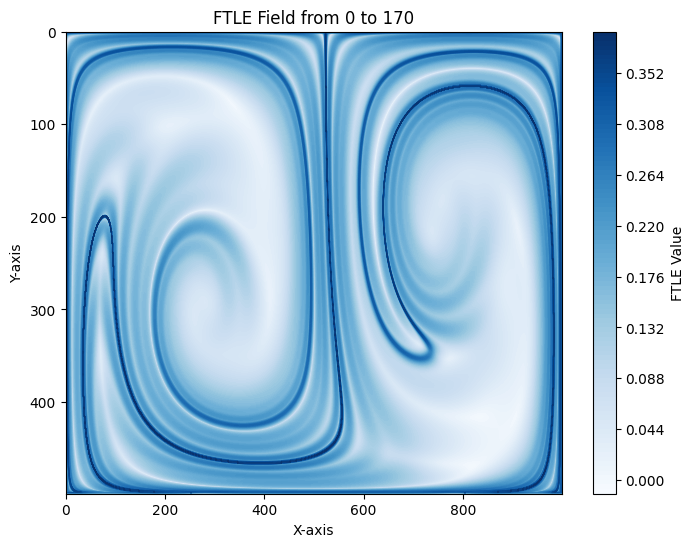

In [4]:
ftle_data, time,filenum = load_ftle_data(filename)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(ftle_data.shape[1])  # X-axis (columns)
y = np.arange(ftle_data.shape[0])  # Y-axis (rows)

X, Y = np.meshgrid(x, y)

# Create the contour plot
c = ax.contourf(X, Y, ftle_data, 100, cmap=plt.cm.Blues)

# Add the colorbar to the same figure and axis
fig.colorbar(c, ax=ax, label='FTLE Value')

# Set axis labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title(f'FTLE Field from {0} to {filenum}')

# Optional: Invert the y-axis if needed
plt.gca().invert_yaxis()

# Display the plot
plt.show()